In [1]:
from glob import glob
from typing import List, Tuple

from transformers import BertJapaneseTokenizer, BertModel

In [2]:
pre_train_path = 'cl-tohoku/bert-base-japanese-whole-word-masking'

In [3]:
tokenizer = BertJapaneseTokenizer.from_pretrained(pre_train_path)
model = BertModel.from_pretrained(pre_train_path)

In [4]:
def load_texts(paths: List[str]) -> List[str]:
    texts = []
    for p in paths:
        with open(p, 'rt') as f:
            text = f.read()
            texts.append(text)
    return texts

In [5]:
it_paths = glob('text/it-life-hack/*.txt')
it_texts = load_texts(it_paths)

In [6]:
kaden_paths = glob('text/kaden-channel/*.txt')
kaden_texts = load_texts(kaden_paths)

In [7]:
import numpy as np
from sklearn.manifold import TSNE

In [8]:
print(len(it_texts))
print(len(kaden_texts))

871
865


In [9]:
def vectorize(text: str) -> np.ndarray:
    inputs = tokenizer(it_texts[0], return_tensors='pt')
    for key in inputs.keys():
        inputs[key] = inputs[key][:, :512]
    outputs = model(**inputs)
    output = outputs.last_hidden_state
    return output[0].mean(axis=1).detach().numpy()

In [11]:
n = 20

In [12]:
X = [vectorize(text) for text in it_texts[:n] + kaden_texts[:n]]
len(X)

Token indices sequence length is longer than the specified maximum sequence length for this model (648 > 512). Running this sequence through the model will result in indexing errors


40

In [13]:
y = []

In [14]:
model = TSNE(n_components=2)
X_embed = model.fit_transform(X)

In [15]:
import matplotlib.pyplot as plt

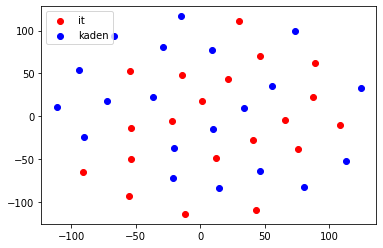

In [16]:
fig, ax = plt.subplots(1, 1)
ax.scatter(X_embed[:n, 0], X_embed[:n, 1], color='red', label='it')
ax.scatter(X_embed[n:, 0], X_embed[n:, 1], color='blue', label='kaden')
ax.legend(loc='upper left')
plt.show()